In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# ファイルの読み込み
df_train = pd.read_table('train.tsv', encoding='utf-8')
df_test = pd.read_table('test.tsv', encoding='utf-8')

In [0]:
# データを見てみよう
df_full = pd.concat([df_train, df_test], axis=0, ignore_index=True)
print(df_full.shape)
df_full.describe()

(3176, 16)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,account_age_hours,bot,default_profile,default_profile_image,diversity,favourites_count,followers_count,friends_count,geo_enabled,id,listed_count,mean_mins_between_tweets,mean_retweets,mean_tweet_length,reply_rate,statuses_count
count,3176.000000,1588.000000,3176.000000,3176.000000,3176.000000,3176.000000,3.176000e+03,3.176000e+03,3176.000000,3176.000000,3176.000000,3.176000e+03,3176.000000,3176.000000,3176.000000,3176.000000
mean,43663.829975,0.153023,0.289673,0.031171,0.679065,1099.569270,3.709290e+03,2.358259e+03,0.441751,1587.500000,84.766058,1.471542e+04,3.873158,91.411502,0.341110,3277.342569
std,17862.569953,0.360123,0.453682,0.173808,0.140598,5642.348393,4.385638e+04,2.911900e+04,0.496674,916.976554,348.608750,5.373373e+04,42.676343,19.083251,0.248134,8644.423750
min,2072.000000,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000e+00,1.100000e+01,0.000000,0.000000,0.000000,-1.565449e+01,1.000000,8.500000,0.000000,0.000000
25%,30284.750000,0.000000,0.000000,0.000000,0.625419,14.000000,9.500000e+01,3.000000e+02,0.000000,793.750000,4.000000,1.152765e+03,1.166667,80.788596,0.123235,188.000000
50%,47484.000000,0.000000,0.000000,0.000000,0.696303,122.000000,2.880000e+02,6.150000e+02,0.000000,1587.500000,16.000000,3.851690e+03,1.636364,91.741079,0.313725,723.000000
75%,56718.000000,0.000000,1.000000,0.000000,0.762596,593.000000,8.305000e+02,1.229000e+03,1.000000,2381.250000,51.000000,1.082377e+04,2.423925,103.283673,0.527856,2646.500000
max,78841.000000,1.000000,1.000000,1.000000,1.000000,176219.000000,1.396699e+06,1.175187e+06,1.000000,3175.000000,9491.000000,1.139015e+06,1961.300000,287.875912,1.000000,137264.000000


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


0    1345
1     243
Name: bot, dtype: int64

0    0.846977
1    0.153023
Name: bot, dtype: float64

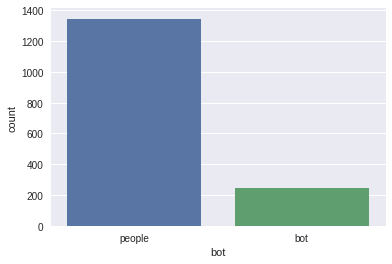

In [0]:
sns.countplot(x="bot", data=df_train)
plt.xticks([0,1],["people","bot"])
display(df_train["bot"].value_counts())
display(df_train["bot"].value_counts()/len(df_train["bot"]))

In [0]:
# データ作成
X_train = df_train.drop(["id", "bot"], axis=1)
Y_train = df_train["bot"]
X_test = df_test.drop("id", axis=1).copy()

In [0]:
from sklearn .ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=1)
forest.fit(X_train,Y_train)
acc_log = round(forest.score(X_train, Y_train) * 100,2)
print(round(acc_log,2,), "%")

99.31 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


交差検証

In [0]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X_train, Y_train):
  X_cv_train = X_train.iloc[train_index]
  X_cv_test = X_train.iloc[test_index]
  Y_cv_train = Y_train.iloc[train_index]
  Y_cv_test = Y_train.iloc[test_index]
  
  forest = RandomForestClassifier(random_state=1)
  forest.fit(X_cv_train, Y_cv_train)
  predictions = forest.predict(X_cv_test)
  
  print(round(accuracy_score(Y_cv_test,forest.predict(X_cv_test))*100,2))

93.58
88.66
89.98


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


一旦サブミットしてみる →　0.58968

In [0]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, Y_train)
Y_prediction = forest.predict(X_test)

submit = pd.DataFrame({ "id":test_data["id"], "bot": Y_prediction})
submit.to_csv("./bot_result7.csv", index=False,header=None)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


特徴量の重要度

In [0]:

for i,k in zip(X_train.columns,forest.feature_importances_):
  print(i,round(k,4))

statuses_count 0.0923
default_profile 0.0359
default_profile_image 0.0395
friends_count 0.1197
followers_count 0.1767
favourites_count 0.1091
geo_enabled 0.0123
listed_count 0.1125
account_age_hours 0.0567
diversity 0.0544
mean_mins_between_tweets 0.0619
mean_tweet_length 0.0453
mean_retweets 0.0442
reply_rate 0.0394


標準化

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [0]:
X_train_sc
X_test_sc

array([[-0.1444335 , -0.64641871, -0.17843446, ..., -0.09310051,
        -0.02146064, -0.89741757],
       [-0.31188161, -0.64641871, -0.17843446, ..., -1.33385247,
        -0.04712409,  1.07180913],
       [-0.38228456, -0.64641871, -0.17843446, ...,  0.32680919,
        -0.09845099, -1.05004563],
       ...,
       [-0.36649211, -0.64641871, -0.17843446, ..., -0.54858649,
        -0.05853007,  0.98862916],
       [-0.25594502, -0.64641871, -0.17843446, ...,  0.96813429,
        -0.08134203,  0.71645825],
       [-0.36757709,  1.54698494, -0.17843446, ..., -0.91813111,
        -0.09845099, -0.07627861]])

In [0]:
forest_sc = RandomForestClassifier(random_state=1)
forest_sc.fit(X_train_sc,Y_train)
acc_log_sc = round(forest_sc.score(X_train_sc, Y_train) * 100,2)
print(round(acc_log_sc,2,), "%")

99.31 %


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
kf = KFold(n_splits=3)

for train_index, test_index in kf.split(X_train, Y_train):
  X_cv_train = X_train.iloc[train_index]
  X_cv_test = X_train.iloc[test_index]
  Y_cv_train = Y_train.iloc[train_index]
  Y_cv_test = Y_train.iloc[test_index]
  
  forest = RandomForestClassifier(random_state=5)
  forest.fit(X_cv_train, Y_cv_train)
  predictions = forest.predict(X_cv_test)
  
  print(round(accuracy_score(Y_cv_test,forest.predict(X_cv_test))*100,2))

93.96
89.98
89.98


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
forest = RandomForestClassifier(random_state=5)
forest.fit(X_train, Y_train)
Y_prediction = forest.predict(X_test)

submit = pd.DataFrame({ "id":test_data["id"], "bot": Y_prediction})
submit.to_csv("./bot_result9.csv", index=False,header=None)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
